# Prueba A/B `recommender_system_test`
Las prubas A/B son fundamentales y nos permiten determinar si hubo mejoras en métricas de negocio, como conversión, clicks, permanencia, etc. Hoy comprobaremos si hubo una mejor conversión tras la introducción de un sistema de recomendaciones mejorado para una tienda online. Tenemos datos de una prueba A/B inconclusa. El equipo que la lanzó afirmó que la conversión en cada etapa del embudo aumento por lo menos un 10%. 

Éstas son nuestras tareas:

 - Comprobar si la prueba A/B fue realizada correctamente.
 - Comprobar si en verdad hubo un aumento de al menos 10% en cada parte del embudo.
 - Dar conclusiones respecto al análisis y el éxito o fracaso de la prueba. 

## Limpieza de datos
Primero daremos orden a los datos. Tenemos cuatro tablas. Las describiré brevemente:
 - `ab_project_marketing_events_us.csv`: el calendario de eventos de marketing para 2020.
 - `final_ab_new_users_upd_us.csv`: todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020.
 - `final_ab_events_upd_us.csv`: todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021.
 - `final_ab_participants_upd_us.csv`: tabla con los datos de los participantes de la prueba.

### Primera tabla
Analicemos el calendario de eventos de marketing para 2020 (`ab_project_marketing_events_us.csv`).

In [1]:
import pandas as pd
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
display(marketing_events.head(3))
marketing_events.info()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [2]:
print(f'El número de duplicados es {marketing_events.duplicated().sum()}.')

El número de duplicados es 0.


No hay nulos ni nada fuera de lugar. El único cambio que haremos será pasar las fechas a un tipo diferente.

In [3]:
# Conversión de columnas a datetime
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

# Verificación
print(marketing_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None


### Segunda tabla
Continuemos con la tabla que contiene los usuarios registrados en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020: `final_ab_new_users_upd_us.csv`

In [4]:
import pandas as pd
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
display(new_users.head(3))
new_users.info()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [5]:
print(f'El número de duplicados es {new_users.duplicated().sum()}.')

El número de duplicados es 0.


No hay nulos ni dupolicados. Haremos de la columna `first_date` una columna de tipo 'datetime'.

In [6]:
# Conversión de columnas a datetime
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

# Verificación
print(new_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB
None


### Tercera tabla
La tabla `final_ab_events_upd_us.csv` contiene los eventos de los usuarios durante el periodo de la prueba. De esta tabla tomaremos la información necesaria para hacer el embudo.

In [7]:
import pandas as pd
users_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
display(users_events.head(3))
users_events.info()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [8]:
print(f'El número de duplicados es {users_events.duplicated().sum()}.')

El número de duplicados es 0.


Más de lo mismo con las fechas. Solamente vamos a transformar la columna `event_dt` a tipo 'datetime'. Hay datos nulos en la columna `'details'`, pero lo que nos importa en este proyecto es la conversión y el embudo, así que dejaremos los datos como nulos; no tendrá efectos en nuestro análisis.

In [9]:
# Conversión de columnas a datetime.
users_events['event_dt'] = pd.to_datetime(users_events['event_dt'])

# Verificación
print(users_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB
None


### Cuarta tabla
Finalmente echemos un vistazo a la tabla `final_ab_participants_upd_us.csv`, que contiene los datos de los participantes de la prueba.

In [10]:
import pandas as pd
participants_data = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
display(participants_data.head(3))
participants_data.info()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


No hay nulos y no es necesario cambiar los tipos de datos.

In [11]:
print(f'El número de duplicados es {participants_data.duplicated().sum()}.')

El número de duplicados es 0.


In [12]:
len(participants_data[participants_data['ab_test'] == 'recommender_system_test'])

3675

Tampoco hay duplicados. Las tablas están lista para trabajar sobre ellas.

### Tabla final
Ahora que tenemos tablas con información bien estandarizada, podemos comenzar a analizar el embudo. Vamos a unir tres tablas con base en el identificador del usuario.

A `users_events`(que contiene la estampa del evento y su nombre) le agregaremos `participants_data` que incluye el grupo del individuo y la columna `'ab_test'`, donde veremos si se trata de la prueba `recommender_system_test`; sólo añadiremos la información que sea del test que nos interesa, para eso será necesario filtrar. Después, en `new_users`, filtraremos sólo a usuarios de EU con las fechas de inscripción que cubran los 14 días indicados en las instrucciones. Al final uniremos las dos tablas resultantes para tener una tabla final con la información necesaria.

In [13]:
# Primero filtremos con base en el experimento que nos interesa. 
# Usamos copy() porque reasignamos el resultado a la misma variable.
participants_data = participants_data[participants_data['ab_test'] == 'recommender_system_test'].copy()

# Ahora sí, vamos a empezar a unir tablas.
funnel_data = users_events.merge (participants_data, on = 'user_id', how = 'inner' )

# Comprobación.
display(funnel_data.head(3))
print()
funnel_data.info()

,user_id,event_dt,event_name,details,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,A,recommender_system_test



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23909 entries, 0 to 23908
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23909 non-null  object        
 1   event_dt    23909 non-null  datetime64[ns]
 2   event_name  23909 non-null  object        
 3   details     3210 non-null   float64       
 4   group       23909 non-null  object        
 5   ab_test     23909 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.3+ MB


Ahora creemos una nueva tabla con base en `new_users`. Esta nueva tabla sólo contendrá a los usuarios de la región correcta y las fechas de inscripción.

In [14]:
# Nueva tabla con los usuarios seleccionados para la prueba.
eu_new_users = new_users[
    (new_users['region'] == 'EU') &
    (new_users['first_date'] >= '2020-12-07') &
    (new_users['first_date'] <= '2020-12-21')
].copy()

# Comprobación.
display(eu_new_users.head(3))

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone


Finalmente tomamos `eu_new_users` y le unimos la tabla `funnel_data`.

In [15]:
# La tabla final, con los datos de los usuarios que cumplen las condiciones y su actividad.
eu_funnel_data = eu_new_users.merge(funnel_data, on = 'user_id', how = 'inner')

display(eu_funnel_data.head())

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,NaN,B,recommender_system_test
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,NaN,B,recommender_system_test
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,NaN,B,recommender_system_test


¿Se cumple la condición de que serían aproximadamente 6000 usuarios?

In [16]:
print(f"El número de usuarios que cumple los criterios de selección y que tuvo \nparticipación después de inscripción es de {eu_funnel_data['user_id'].nunique()}.")


El número de usuarios que cumple los criterios de selección y que tuvo 
participación después de inscripción es de 3481.


La condición no se cumple, así como tampoco se cumple la condición de tener en observación por catorce días a __todos los usuarios__ inscritos en los últimos días; esto se debe a que sólo hay datos de eventos hasta el primero de enero de 2021.

Esto indica que hay usuarios que se inscribieron y no volvieron a la página o app y que probablemente hubo usuarios que se inscribieron en los últimos días y que sí volvieron dentro de los 14 días posteriores, pero no quedaron registrados porque sólo hay información hasta el primero de enero.

## Análisis exploratorio
La tabla final está lista y empezaremos a formular hipótesis.

### Conversión en las diferentes etapas del embudo
Vamos a familiarizarnos con el embudo. Primero veremos el embudo completo considerando solo las frecuencias totales, para tener una idea general.

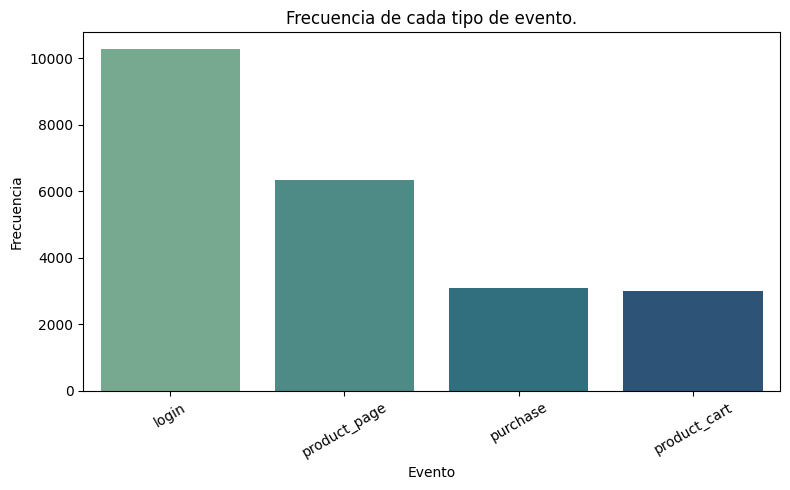

In [17]:
# Vamos a contar los eventos y ordenarlos de forma descendente.
event_counts = eu_funnel_data['event_name'].value_counts().sort_values(ascending=False)

# Con base en 'event_counts' hacemos un DataFrame para poder graficar con seaborn.
event_counts_df = event_counts.reset_index()
event_counts_df.columns = ['event', 'count']

# Librerías para imprimir.
import matplotlib.pyplot as plt
import seaborn as sns

# Representación gráfica.
plt.figure(figsize=(8, 5))
sns.barplot(data=event_counts_df, x='event', y='count', palette='crest')
plt.title('Frecuencia de cada tipo de evento.')
plt.ylabel('Frecuencia')
plt.xlabel('Evento')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



Podemos ver que se empieza a dibujar un embudo que nos da una idea del 'customer journey'. ¿Cómo puede haber más ventas que productos añadidos al carrito? Esto indica un _funnel_ no lineal. Podría haber botones que te permiten 'comprar ahora' sin necesidad de añadir al carrito, como en Amazon. Veamos los números.

In [18]:
print(event_counts_df)

          event  count
0         login  10261
1  product_page   6340
2      purchase   3079
3  product_cart   2994


Para comprobar esta hipótesis de un _funnel_ no lineal, podemos imprimir el los usuarios con compras, pero sin visita al carrito. Si hay muchos, podemos confirmar que una visita al carrito de compras no es necesario para comprar.

In [19]:
# Usuarios que hicieron purchase
users_with_purchase = eu_funnel_data[eu_funnel_data['event_name'] == 'purchase']['user_id'].unique()

# Usuarios que hicieron product_cart
users_with_cart = eu_funnel_data[eu_funnel_data['event_name'] == 'product_cart']['user_id'].unique()

# Pasamos a listas para comparar
users_with_purchase = list(users_with_purchase)
users_with_cart = list(users_with_cart)

# Creamos un DataFrame con los que compraron
purchase_df = pd.DataFrame({'user_id': users_with_purchase, 'purchase': 1})

# Creamos un DataFrame con los que hicieron carrito
cart_df = pd.DataFrame({'user_id': users_with_cart, 'cart': 1})

# Unimos los dos para ver si hay compras sin carrito
merged = purchase_df.merge(cart_df, on='user_id', how='left')

# Filtramos: usuarios que tienen purchase pero no cart
only_purchase = merged[merged['cart'].isna()]

print(f"Número de usuarios con compra pero sin carrito es de {only_purchase.shape[0]}.")


Número de usuarios con compra pero sin carrito es de 746.


El _customer journey_ es diferente a lo que uno podría esperar. No es lineal. Con base en esta información, vamos a hacer un embudo de la secuencia de eventos que el equipo que abandonó el proyecto propuso: `product_page` → `product_cart` → `purchase`. Haremos un embudo para cada grupo.

In [20]:
# Embudo del grupo A.
users_A = eu_funnel_data[eu_funnel_data['group'] == 'A'].pivot_table(
    index='user_id',
    columns='event_name',
    values='event_dt',
    aggfunc='min'
)

for col in ['product_page', 'product_cart', 'purchase']:
    if col not in users_A.columns:
        users_A[col] = pd.NaT

step_1_A = ~users_A['product_page'].isna()
step_2_A = step_1_A & (users_A['product_cart'] > users_A['product_page'])
step_3_A = step_2_A & (users_A['purchase'] > users_A['product_cart'])

n_page_A = users_A[step_1_A].shape[0]
n_cart_A = users_A[step_2_A].shape[0]
n_buy_A  = users_A[step_3_A].shape[0]

print("Grupo A")
print("Vieron página de producto:", n_page_A)
print("Llegaron a carrito:", n_cart_A)
print("Compraron:", n_buy_A)
print()


# Embudo del grupo B.
users_B = eu_funnel_data[eu_funnel_data['group'] == 'B'].pivot_table(
    index='user_id',
    columns='event_name',
    values='event_dt',
    aggfunc='min'
)

for col in ['product_page', 'product_cart', 'purchase']:
    if col not in users_B.columns:
        users_B[col] = pd.NaT

step_1_B = ~users_B['product_page'].isna()
step_2_B = step_1_B & (users_B['product_cart'] > users_B['product_page'])
step_3_B = step_2_B & (users_B['purchase'] > users_B['product_cart'])

n_page_B = users_B[step_1_B].shape[0]
n_cart_B = users_B[step_2_B].shape[0]
n_buy_B  = users_B[step_3_B].shape[0]

print("Grupo B")
print("Vieron página de producto:", n_page_B)
print("Llegaron a carrito:", n_cart_B)
print("Compraron:", n_buy_B)


Grupo A
Vieron página de producto: 1685
Llegaron a carrito: 149
Compraron: 0

Grupo B
Vieron página de producto: 493
Llegaron a carrito: 49
Compraron: 1


Parece que la afirmación de que habrá al menos un 10% de aumento en conversión siguiendo la secuencia propuesta es incorrecta. Veamos las proporciones.

In [21]:
# Grupo A.
print('Grupo A')
print(f"La proporción de usuarios que pasaron de product_page a product_cart fue de {n_cart_A/n_page_A:.2%}.")
print()
print(f"La proporción de usuarios que pasaron de product_cart a purchase fue de {n_buy_A/n_cart_A:.2%}.")
print()
print(f"La proporción de usuarios que pasaron de product_page a purchase (sin pasar por el carrito) fue de {n_buy_A/n_page_A:.2%}.")
print()
print()
print()
# Grupo B.
print('Grupo B')
print(f"La proporción de usuarios que pasaron de product_page a product_cart fue de {n_cart_B/n_page_B:.2%}.")
print()
print(f"La proporción de usuarios que pasaron de product_cart a purchase fue de {n_buy_B/n_cart_B:.2%}.")
print()
print(f"La proporción de usuarios que pasaron de product_page a purchase (sin pasar por el carrito) fue de {n_buy_B/n_page_B:.2%}.")


Grupo A
La proporción de usuarios que pasaron de product_page a product_cart fue de 8.84%.

La proporción de usuarios que pasaron de product_cart a purchase fue de 0.00%.

La proporción de usuarios que pasaron de product_page a purchase (sin pasar por el carrito) fue de 0.00%.



Grupo B
La proporción de usuarios que pasaron de product_page a product_cart fue de 9.94%.

La proporción de usuarios que pasaron de product_cart a purchase fue de 2.04%.

La proporción de usuarios que pasaron de product_page a purchase (sin pasar por el carrito) fue de 0.20%.


La afirmación es definitivamente incorrecta. Si bien hay una diferencia entre los grupos al seguir la secuencia propuesta, es mucho menor: 2.04%.

### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
Si se trata de ver distribuciones, nada mejor que un gráfico. Grafiquemos a través de un diagrama de caja.

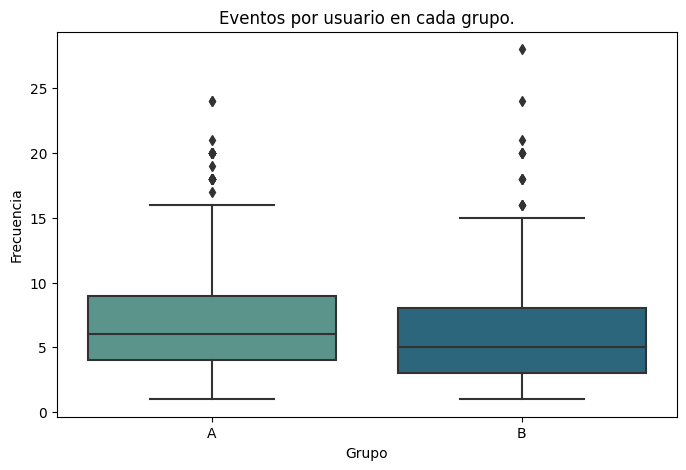

In [22]:
# Eventos agrupados.
events_per_user = (
    eu_funnel_data
    .groupby(['group', 'user_id'])
    .size()
    .reset_index(name='events_count')
)

# Gráfica de la distribución de eventos.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=events_per_user, x='group', y='events_count', palette='crest')
plt.title("Eventos por usuario en cada grupo.")
plt.ylabel('Frecuencia')
plt.xlabel('Grupo')
plt.show()


El número de eventos sí está distribuido de manera equitativa en ambos grupos. ¿Será que el número de usuarios en cada grupo es el mismo?

In [23]:
# Usuarios únicos por grupo en el rango de fechas válidas
users_by_group = eu_funnel_data.groupby('group')['user_id'].nunique().sort_index()

print("Número de usuarios únicos por grupo:")
print(users_by_group)


Número de usuarios únicos por grupo:
group
A    2604
B     877
Name: user_id, dtype: int64


Hay un desbalance importante entre el número de usuarios.

### ¿Hay usuarios que están presentes en ambas muestras?
Hora de comprobar si hay usuarios duplicados.

In [24]:
# Número de usuarios único por grupo.
users_per_group = eu_funnel_data.groupby('user_id')['group'].nunique()

# Usuarios que aparecen en más de un grupo.
users_per_group = users_per_group[users_per_group > 1].count()

print(f"Número de usuarios que aparecen en más de un grupo es de {users_per_group}.")


Número de usuarios que aparecen en más de un grupo es de 0.


No hay usuarios en ambos grupos. Nuestras muestras son independientes.

### ¿Cómo se distribuye el número de eventos entre los días?
Descubramos la distribución de los eventos entre los días usando un histograma. Con base en la columna `'event_dt'` obtendré una columna que sólo contenga la fecha. Se llamará `'date'`. Mostraremos la distribución de ambos grupos.

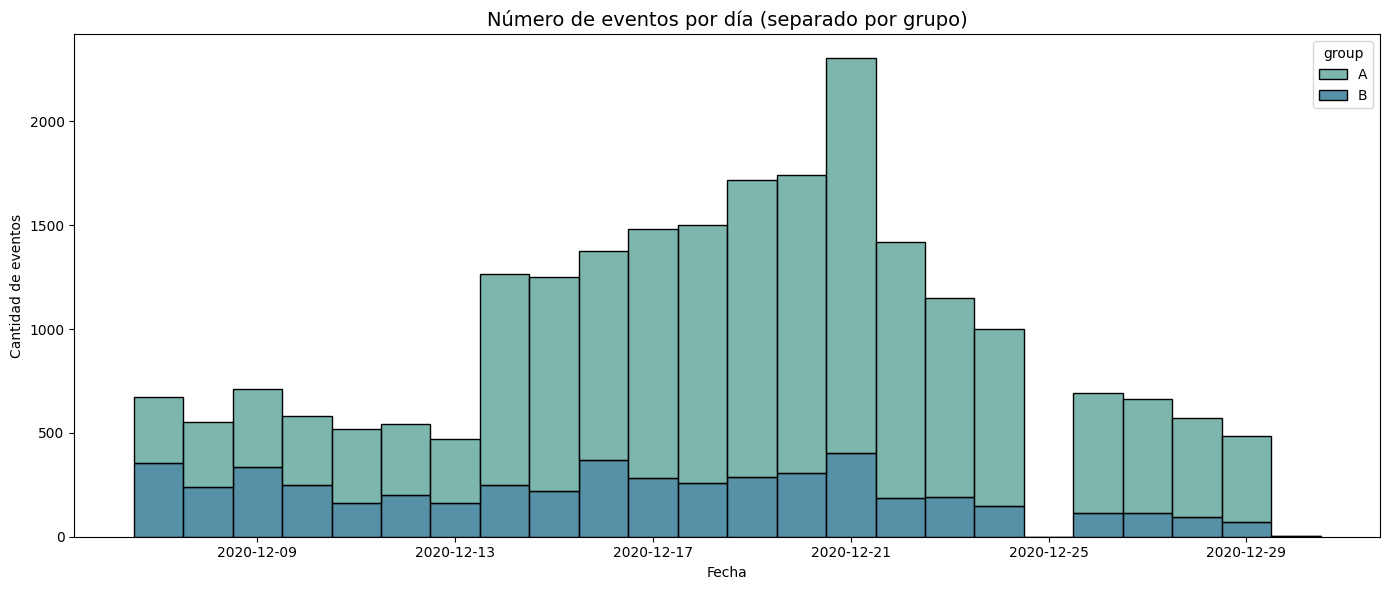

In [25]:
# Crear columna 'date' si no existe
eu_funnel_data['date'] = eu_funnel_data['event_dt'].dt.date

# Histograma con separación por grupo
plt.figure(figsize=(14, 6))
sns.histplot(
    data=eu_funnel_data,
    x='date',
    hue='group',              # separación A vs B
    multiple='stack',         # apilado para ver total y composición
    bins=len(eu_funnel_data['date'].unique()),
    palette='crest'
)

plt.title('Número de eventos por día (separado por grupo)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')




plt.tight_layout()
plt.show()


La mayor actividad se concentró en la parte media de los días. El pico más alto ocurré alrededor del 20-21 de diciembre. En Navidad no hubo actividades. Como era de esperarse, los eventos del grupo B son menos, pues se trata de un grupo considerablemente más pequeño. Además el comportamiento no fue uniforme.

### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
No hay una sola peculiaridad. Hay muchas y las vamos a numerar:

1. El tamaño de la muestra es muy desequilibrado.
2. El periodo de observación está incompleto. Los usuarios que se inscribieron en los últimos días no tienen registros de 14 días porque sólo hay datos hasta el primero de enero.
3. El embudo no es lineal, pero el equipo que hizo la prueba propuso un _customer journey_ que no es representativo de la experiencia de los usuarios al comprar.
4. La conversión fue bajísima. No se acerca el 10% de aumento por etapa que afirmó el grupo que desarrolló la prueba.
5. La prueba se hizo las últimas semanas del año. En fechas como éstas, muchas circunstancias ajenas al nuevo sistema de recomendación podrían alterar la conducta de los usuarios.
6. Incluso con pruebas estadísticas que afirmen una diferencia considerable en las conversiones de los grupos, la validez del experimento queda en entredicho.

## Evaluación de los resultados de la prueba A/B
Para terminar nuestro análisis, vamos a desarrollar una prueba z.

### Prueba z para comprobar la diferencia entre las proporciones

In [26]:
# Importamos la prueba Z
from statsmodels.stats.proportion import proportions_ztest

# Nivel de significación
alpha = 0.05

# Usuarios que hicieron 'purchase' por grupo.
purchase_by_group = eu_funnel_data[eu_funnel_data['event_name'] == 'purchase'].groupby('group')['user_id'].nunique()

# Total de usuarios únicos por grupo
total_users_by_group = eu_funnel_data.groupby('group')['user_id'].nunique()

# Éxitos o pagos exitosos.
successes = [purchase_by_group.loc['A'], purchase_by_group.loc['B']]

# Observaciones totales.
n_obs = [total_users_by_group.loc['A'], total_users_by_group.loc['B']]

# Prueba Z
z_stat, p_val = proportions_ztest(count=successes, nobs=n_obs)

print(f'El valor p es {p_val:.4f}.\n')

if p_val < alpha:
    print("Hay una diferencia estadísticamente significativa entre los grupos A y B.")
else:
    print("No hay una diferencia estadísticamente significativa entre los grupos A y B.")


El valor p es 0.0465.

Hay una diferencia estadísticamente significativa entre los grupos A y B.


La prueba z afirma que hay una diferencia significativa entre los grupos, pero la prueba tiene problemas serios de ejecución y diseño.

## Conclusiones finales
- La prueba presentó limitaciones en el diseño y ejecución. El tamaño de muestra esperado fue considerablemente menor, los grupos estaban desequilibrados y ventana de observación estaba incompleta.  
- El embudo no fue estrictamente lineal, ya que se registraron compras sin pasar por el carrito.  
- Las tasas de conversión fueron bajas en todas las etapas; el grupo B mostró ligeras mejoras, pero muy lejos del 10% afirmado.  
- La prueba z afirma que 'Hay una diferencia estadísticamente significativa entre los grupos A y B', pero después de analizar la prueba y dejar claros sus errores de diseño, ¿podríamos afirmar que el nuevo sistema de recomendaciones tuvo un impacto real en la conversión?
- La prueba fue desarrollada en las últimas semanas de diciembre. Las ventas de toda compañía son diferentes en esas fechas. Se debe considerar la estacionalidad.

En conclusión, el experimento no podría validar la hipótesis de que el nuevo sistema de recomendaciones mejora la conversión. Hay tantos errores en la ejecución que múltiples factores ajenos podrían haber influido en la prueba. La prueba está mal desarrollada. A pesar de que la prueba z afirme una 'diferencia estadísticamente significativa' entre los grupos, las limitaciones del experimento son demasiadas y nos quedamos muy lejos de un aumento del 10%.

Como puedes ver, la aplicación de una prueba estadística no siempre es suficiente para determinar una variación en métricas de negocio. A diferencia de los proyectos anteriores, donde aplicamos pruebas como la _t_ de _Student_ o la _u_ de _Wilcoxon-Mann-Whitney_, en este caso se necesitaba de un análisis más profundo. ¿Por qué usamos la prueba z y cuál es su diferencia con las pruebas anteriores? En el siguiente cuaderno analizaremos la prueba z, sus usos y limitaciones.